Ciclo Crisis 52-55 ignorado (fuera de rango)
Ciclo Expansión 56-69 ignorado (fuera de rango)
Ciclo Recesión 70-81 ignorado (fuera de rango)
Ciclo Crisis 82-84 ignorado (fuera de rango)


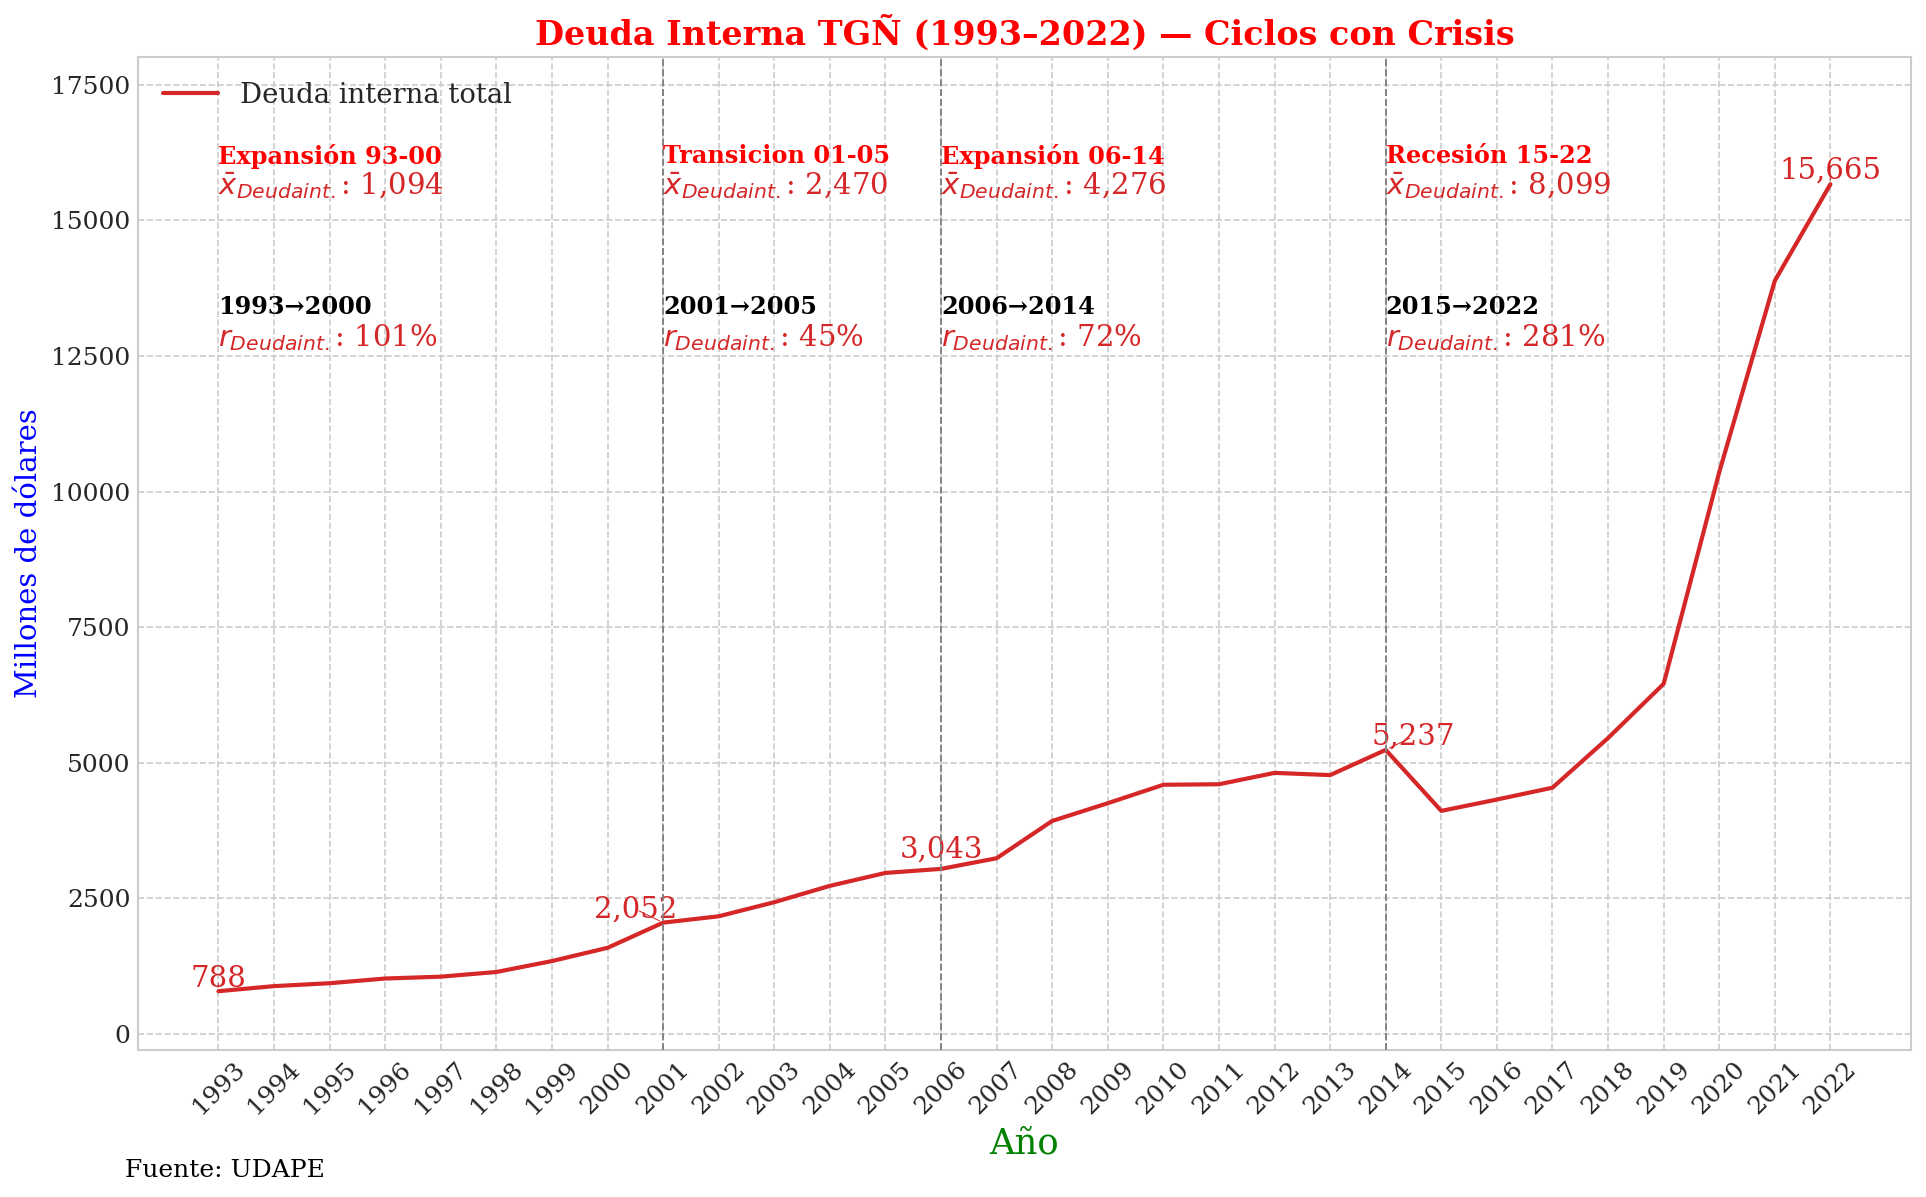

In [6]:
# ─────────────────────────────────────────────────────────────
# Importaciones comunes
# ─────────────────────────────────────────────────────────────
import sys, os, sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath('../'))  # utilidades propias
from graficos_utils import *
from config import ( 
    # Con‑crisis
    CYCLES, annot_years, periodos_tasas, hitos_v,
    # Sin‑crisis
    CYCLES_SIN_CRISIS, annot_years_sin_crisis,
    periodos_tasas_sin_crisis, hitos_v_sin_crisis,
    # Periodos estructurales
    CYCLES_PERIODOS, annot_years_periodos,
    periodos_tasas_periodos, hitos_v_periodos,
)

# Directorio de salida y estilo global
output_dir = "../../../../assets/tesis/serie_completa/deuda_interna"
os.makedirs(output_dir, exist_ok=True)
set_style()

# ─────────────────────────────────────────────────────────────
# Carga de datos
# ─────────────────────────────────────────────────────────────
with sqlite3.connect('../../../../db/proyectomacro.db') as conn:
    df_di = (
        pd.read_sql('SELECT * FROM deuda_interna', conn)
          .set_index('año')
          .sort_index()
    )

# ─────────────────────────────────────────────────────────────
# Componentes comunes
# ─────────────────────────────────────────────────────────────
componentes = [('valor', 'Deuda interna total')]
cols_componentes = ['valor']
abbr_map = {'valor': 'Deuda int.'}
custom_colors = {'valor': '#d62728'}


# ============================================================
# 1) PRIMERA GRÁFICA — CON CRISIS
# ============================================================
# Preparación
annotate_years       = adjust_annot_years(df_di, annot_years)
cycles_stats         = {n: df_di.loc[s, cols_componentes].mean().to_dict()
                        for n, s in adjust_cycles(df_di, CYCLES).items()}
periodos             = adjust_periods(df_di, periodos_tasas)

# Offsets
annotation_offsets = {
    'valor': {
        1993: (0,   220),
        2001: (-0.5, 250),
        2006: (0,   350),
        2014: (0.5, 250),
        2022: (0,   250),
    }
}

hitos_offset = {a: 0.8 for a in hitos_v}

medias_offsets = {
    'Expansión 93-00':  (1993, 1),
    'Transicion 01-05': (2001, 1),
    'Expansión 06-14':  (2006, 1),
    'Recesión 15-22':   (2014, 1),
}

tasas_offsets = {
    '1993-2000': (1993, 0.83),
    '2001-2005': (2001, 0.83),
    '2006-2014': (2006, 0.83),
    '2015-2022': (2014, 0.83),
}


# Gráfica
fig, ax = init_base_plot(
    df_di, componentes, custom_colors,
    "Deuda Interna TGÑ (1993–2022) — Ciclos con Crisis",
    "Año", "Millones de dólares",
    source_text="Fuente: UDAPE"
)
add_hitos(ax, df_di.index, hitos_v, hitos_offset, line_kwargs={'lw': 0.9})
add_cycle_means_multi(ax, cycles_stats, medias_offsets, abbr_map, custom_colors,
                      line_spacing=ax.get_ylim()[1]*0.03)
add_year_value_annotations(ax, df_di, annotate_years, cols_componentes,
                           annotation_offsets, custom_colors, arrow_lw=0.5)
add_period_growth_annotations_multi(ax, df_di, periodos, cols_componentes,
                                    tasas_offsets, custom_colors, abbr_map)

ax.set_ylim(-300, df_di['valor'].max()*1.15)
plt.savefig(os.path.join(output_dir, "deuda_interna_ciclos.png"))
plt.show()
plt.close()


Ciclo Expansión 56-69 ignorado (fuera de rango)
Ciclo Recesión 70-84 ignorado (fuera de rango)


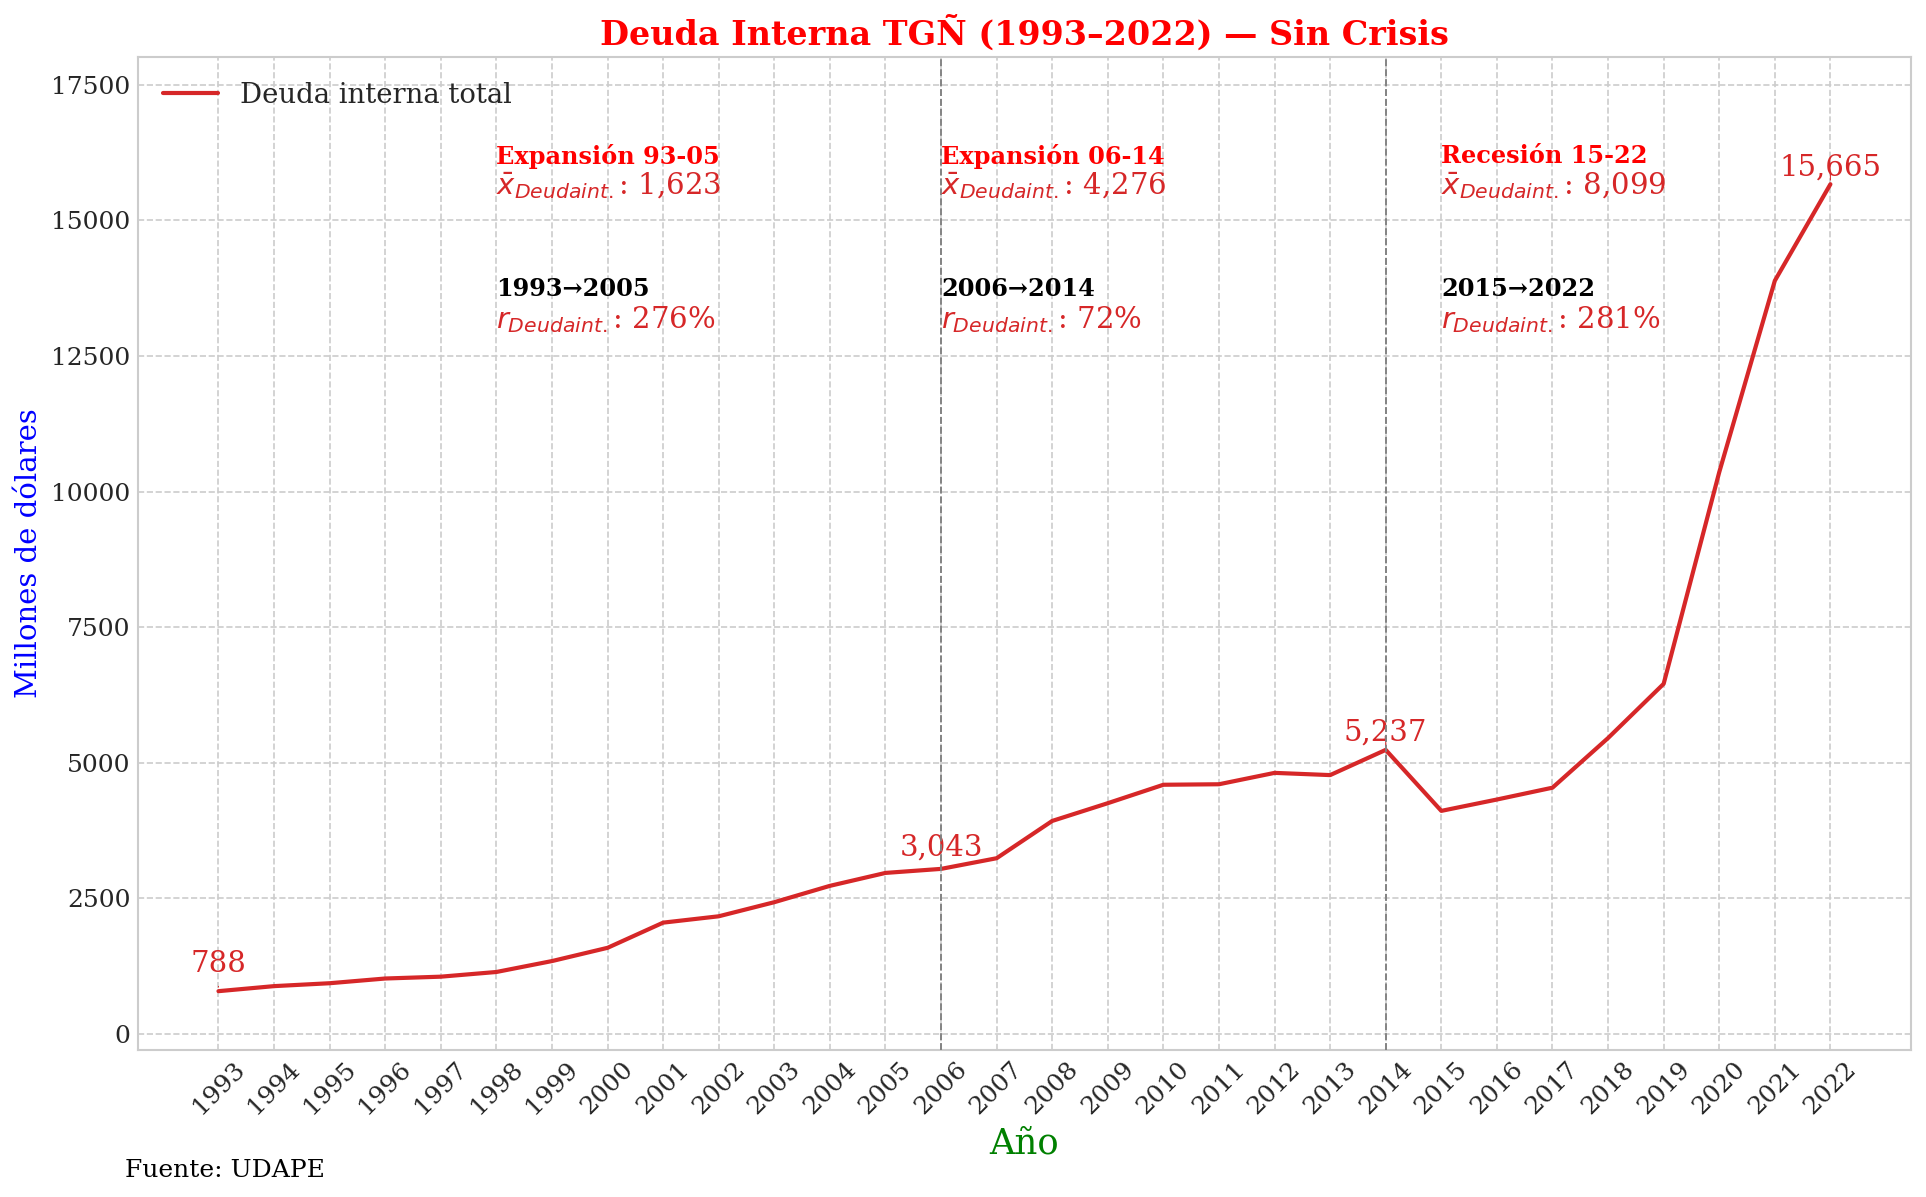

In [9]:
# ============================================================
# 2) SEGUNDA GRÁFICA — SIN CRISIS
# ============================================================
# Preparación
annotate_years_sin_crisis = adjust_annot_years(df_di, annot_years_sin_crisis)
cycles_stats_sin_crisis   = {n: df_di.loc[s, cols_componentes].mean().to_dict()
                             for n, s in adjust_cycles(df_di, CYCLES_SIN_CRISIS).items()}
periodos_sin_crisis       = adjust_periods(df_di, periodos_tasas_sin_crisis)

# Offsets
annotation_offsets_sin_crisis = {
    'valor': {
        1993: (0, 500), 2006: (0, 400), 2014: (0, 320), 2022: (0, 300)
    }
}
hitos_offset_sin_crisis       = {a: 0.8 for a in hitos_v_sin_crisis}
medias_offsets_sin_crisis     = {
    'Expansión 93-05': (1998, 1),
    'Expansión 06-14': (2006, 1),
    'Recesión 15-22':  (2015, 1),
}
tasas_offsets_sin_crisis = {
    '1993-2005': (1998, 0.85),
    '2006-2014': (2006, 0.85),
    '2015-2022': (2015, 0.85),
}

# Gráfica
fig, ax = init_base_plot(
    df_di, componentes, custom_colors,
    "Deuda Interna TGÑ (1993–2022) — Sin Crisis",
    "Año", "Millones de dólares",
    source_text="Fuente: UDAPE"
)
add_hitos(ax, df_di.index, hitos_v_sin_crisis, hitos_offset_sin_crisis, line_kwargs={'lw':0.9})
add_cycle_means_multi(ax, cycles_stats_sin_crisis, medias_offsets_sin_crisis,
                      abbr_map, custom_colors, line_spacing=ax.get_ylim()[1]*0.03)
add_year_value_annotations(ax, df_di, annotate_years_sin_crisis, cols_componentes,
                           annotation_offsets_sin_crisis, custom_colors, arrow_lw=0.5)
add_period_growth_annotations_multi(ax, df_di, periodos_sin_crisis, cols_componentes,
                                    tasas_offsets_sin_crisis, custom_colors, abbr_map)

ax.set_ylim(-300, df_di['valor'].max()*1.15)
plt.savefig(os.path.join(output_dir, "deuda_interna_sin_crisis.png"))
plt.show()
plt.close()

Ciclo Intervensionismo-estatal 52-84 ignorado (fuera de rango)


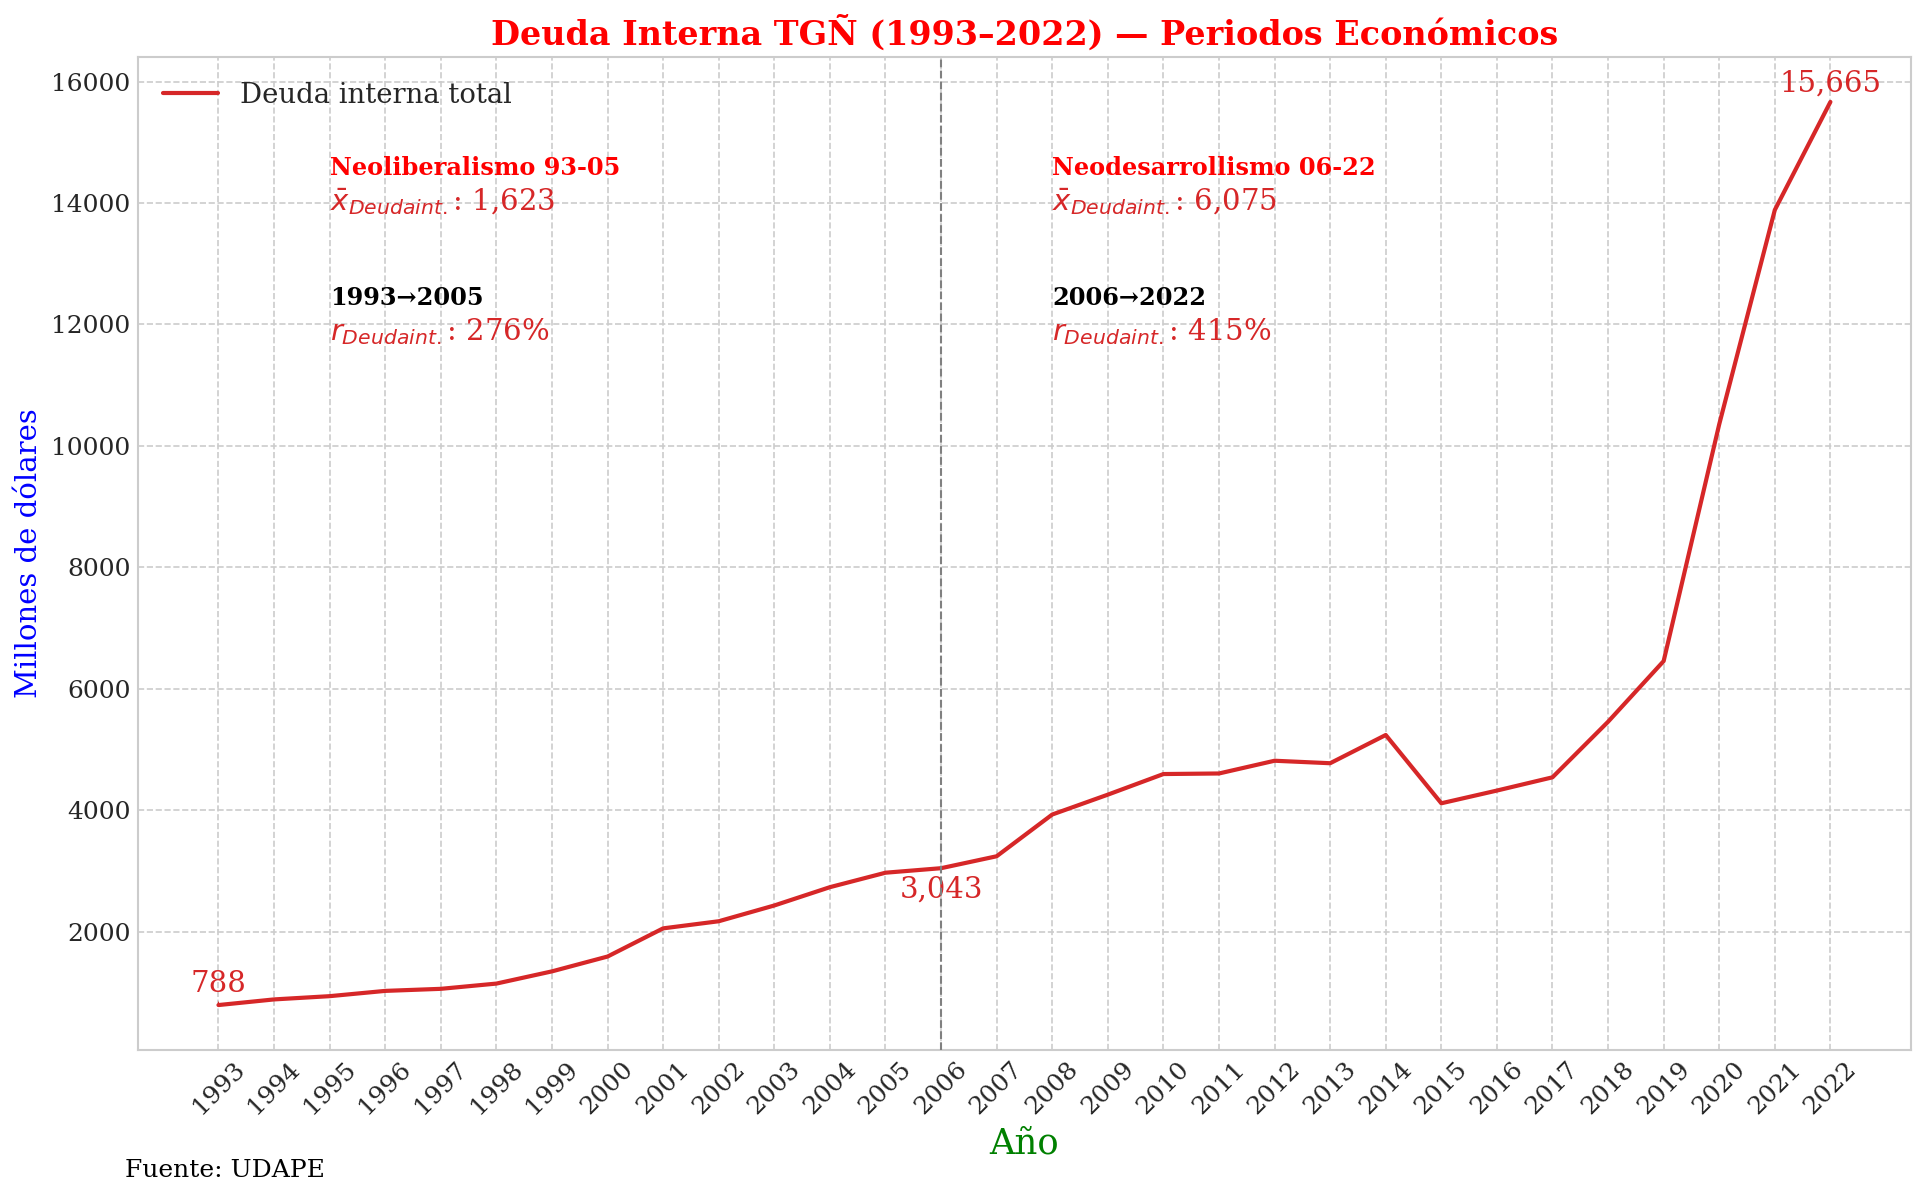

In [10]:
# ============================================================
# 3) TERCERA GRÁFICA — PERIODOS ESTRUCTURALES
# ============================================================
# Preparación
annotate_years_periodos = adjust_annot_years(df_di, annot_years_periodos)
cycles_stats_periodos   = {n: df_di.loc[s, cols_componentes].mean().to_dict()
                           for n, s in adjust_cycles(df_di, CYCLES_PERIODOS).items()}
periodos_periodos       = adjust_periods(df_di, periodos_tasas_periodos)

# Offsets
annotation_offsets_periodos = {
    'valor': {
        1993: (0, 350),
        2006: (0, -350),
        2022: (0, 300),
    }
}
hitos_offset_periodos       = {a: 0.8 for a in hitos_v_periodos}
medias_offsets_periodos     = {
    'Neoliberalismo 93-05':    (1995, 0.9),
    'Neodesarrollismo 06-22':  (2008, 0.9),
}
# Tasas y participación específicas del resumen

tasas_offsets_periodos = {
    '1993-2005': (1995, 0.77),
    '2006-2022': (2008, 0.77),
}
# Gráfica
fig, ax = init_base_plot(
    df_di, componentes, custom_colors,
    "Deuda Interna TGÑ (1993–2022) — Periodos Económicos",
    "Año", "Millones de dólares",
    source_text="Fuente: UDAPE"
)
add_hitos(ax, df_di.index, hitos_v_periodos, hitos_offset_periodos,
          annotate_labels=tuple(), line_kwargs={'lw':1.0})
add_cycle_means_multi(ax, cycles_stats_periodos, medias_offsets_periodos,
                      abbr_map, custom_colors, line_spacing=ax.get_ylim()[1]*0.03)
add_year_value_annotations(ax, df_di, annotate_years_periodos, cols_componentes,
                           annotation_offsets_periodos, custom_colors, arrow_lw=0.5)
add_period_growth_annotations_multi(ax, df_di, periodos_periodos, cols_componentes,
                                    tasas_offsets_periodos, custom_colors, abbr_map)
plt.savefig(os.path.join(output_dir, "deuda_interna_periodos.png"))
plt.show()
plt.close()
